In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("Week7_train.csv")
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(42000, 785)

In [4]:
df_train_sample=df_train.sample(frac=0.10,random_state=42)

In [5]:
df_train_sample.shape

(4200, 785)

In [6]:
df_train_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train_sample['label'].unique()

array([8, 1, 9, 6, 2, 7, 3, 4, 5, 0])

In [8]:
df_train_sample.count()

label       4200
pixel0      4200
pixel1      4200
pixel2      4200
pixel3      4200
            ... 
pixel779    4200
pixel780    4200
pixel781    4200
pixel782    4200
pixel783    4200
Length: 785, dtype: int64

In [9]:
x=df_train_sample.drop(columns='label')
y=df_train_sample['label']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,y_train.shape

((2940, 784), (2940,))

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([9, 3, 6, ..., 5, 3, 2])

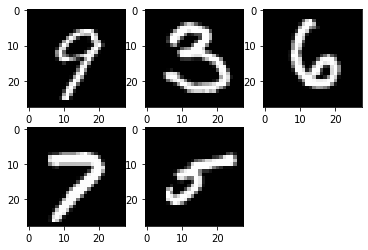

In [23]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_test.iloc[i].values.reshape(28,28),cmap='gray')
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_train)
y_pred

array([0, 3, 5, ..., 8, 7, 2])

In [26]:
y_val_pred=model.predict(x_test)
y_val_pred

array([9, 3, 6, ..., 5, 3, 2])

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_val_pred)
cm

array([[118,   0,   1,   1,   0,   0,   3,   0,   0,   0],
       [  0, 139,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   8,  98,   1,   1,   0,   0,   3,   0,   0],
       [  0,   0,   3, 155,   0,   5,   0,   0,   1,   3],
       [  0,   0,   0,   0, 111,   0,   2,   0,   0,   8],
       [  0,   1,   0,   3,   0,  92,   3,   1,   0,   0],
       [  1,   1,   0,   0,   0,   1, 121,   0,   0,   0],
       [  0,   9,   1,   0,   0,   0,   0, 122,   0,   5],
       [  1,   5,   0,   7,   0,   1,   1,   1,  97,   4],
       [  1,   2,   0,   0,   4,   0,   0,   7,   1, 106]])

In [31]:
from sklearn.metrics import classification_report,accuracy_score
cr=classification_report(y_test,y_val_pred)
print(cr)
accuracy=accuracy_score(y_test,y_val_pred)
accuracy

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       123
           1       0.84      1.00      0.91       139
           2       0.95      0.88      0.92       111
           3       0.93      0.93      0.93       167
           4       0.96      0.92      0.94       121
           5       0.93      0.92      0.92       100
           6       0.93      0.98      0.95       124
           7       0.91      0.89      0.90       137
           8       0.98      0.83      0.90       117
           9       0.84      0.88      0.86       121

    accuracy                           0.92      1260
   macro avg       0.92      0.92      0.92      1260
weighted avg       0.92      0.92      0.92      1260



0.9198412698412698

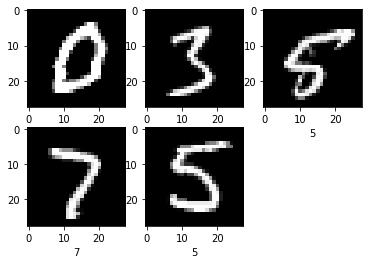

In [36]:
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train.iloc[i].values.reshape(28,28),cmap='gray')
    plt.xlabel(y_train.iloc[i])
plt.show()